In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Boxplot before Removing Outlier

In [3]:
df = pd.read_csv('../docs 2nd Approach/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)

list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))

df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df


,0.5v,3v,6v,9v,12v,15v,18v,21v,24.5v
0,-24.0,-2.0,-1.333333,-0.666667,-0.666667,-0.866667,-0.333333,-0.190476,-0.204082
1,-24.0,-2.0,-1.333333,-0.666667,-0.666667,-0.733333,-0.222222,-0.190476,-0.204082
2,-24.0,-2.0,-1.000000,-0.666667,-0.666667,-0.533333,-0.222222,-0.190476,-0.204082
3,-18.0,-1.0,-1.000000,-0.666667,-0.500000,-0.533333,-0.222222,-0.190476,-0.204082
4,-14.0,-1.0,-1.000000,-0.666667,-0.500000,-0.400000,-0.222222,-0.190476,-0.122449
...,...,...,...,...,...,...,...,...,...
995,16.0,2.0,0.666667,0.666667,0.333333,0.266667,0.333333,0.285714,0.285714
996,16.0,2.0,1.000000,0.666667,0.333333,0.266667,0.333333,0.285714,0.285714
997,16.0,2.0,1.000000,0.666667,0.500000,0.266667,0.333333,0.428571,0.285714
998,16.0,2.0,1.000000,0.666667,0.500000,0.400000,0.333333,0.428571,0.285714


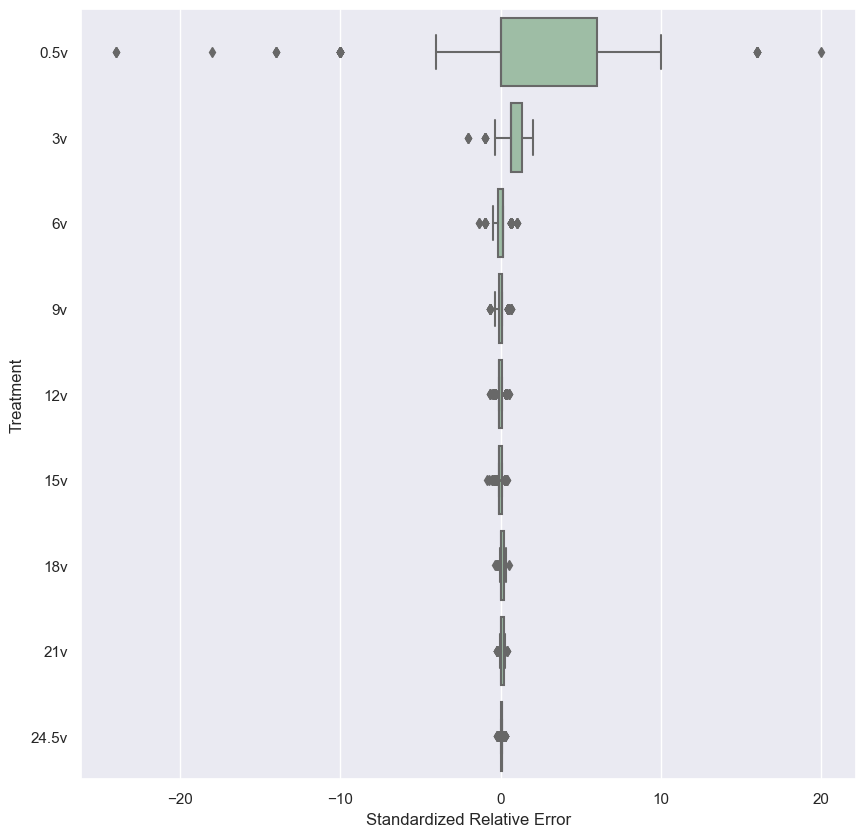

In [4]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.show()

Text(0, 0.5, 'Relative Error Voltage')

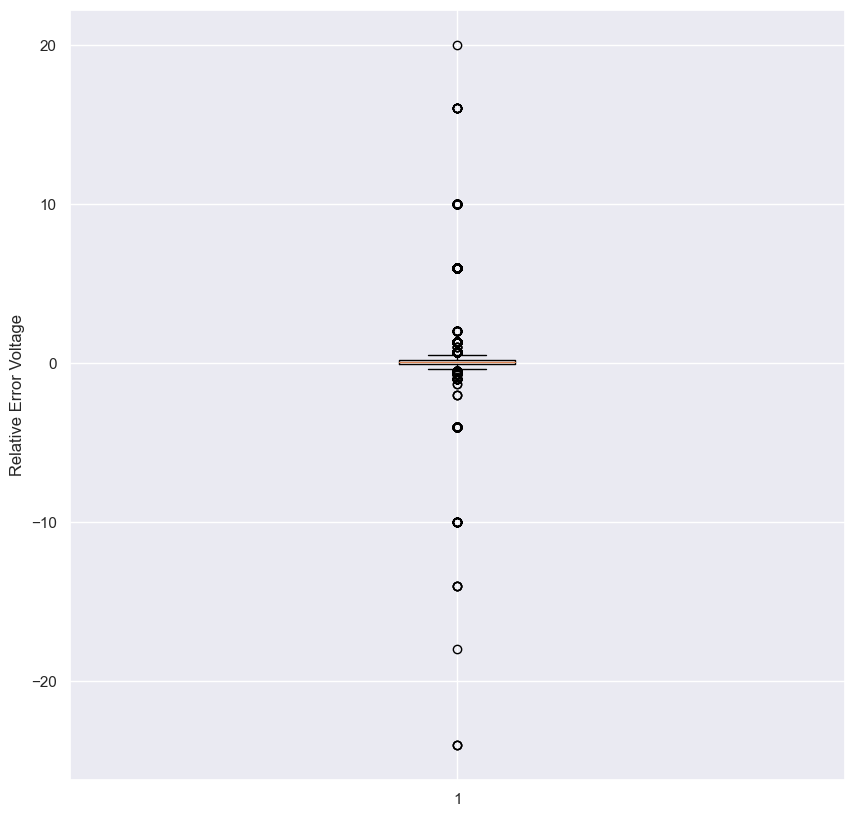

In [5]:
plt.boxplot(df_melt['value'])
plt.ylabel('Relative Error Voltage')

# Removing Based on Standard Deviation

In [6]:
print(f"Removing from : {df_melt['value'].mean() + df_melt['value'].std()} to {df_melt['value'].mean() - df_melt['value'].std()}")

Removing from : 1.9972001314387566 to -1.3532744574654627


In [7]:
df_melt_remove = df_melt.drop(df_melt[
    (df_melt['value'] > df_melt['value'].mean() + df_melt['value'].std()) | 
    (df_melt['value'] < df_melt['value'].mean() - df_melt['value'].std())
].index)
df_melt_remove = df_melt_remove.reset_index()

df_melt_remove.to_csv('../docs 2nd Approach/remove_outlier_whole_std.csv', index=False)

In [8]:
len(df_melt_remove)

8487

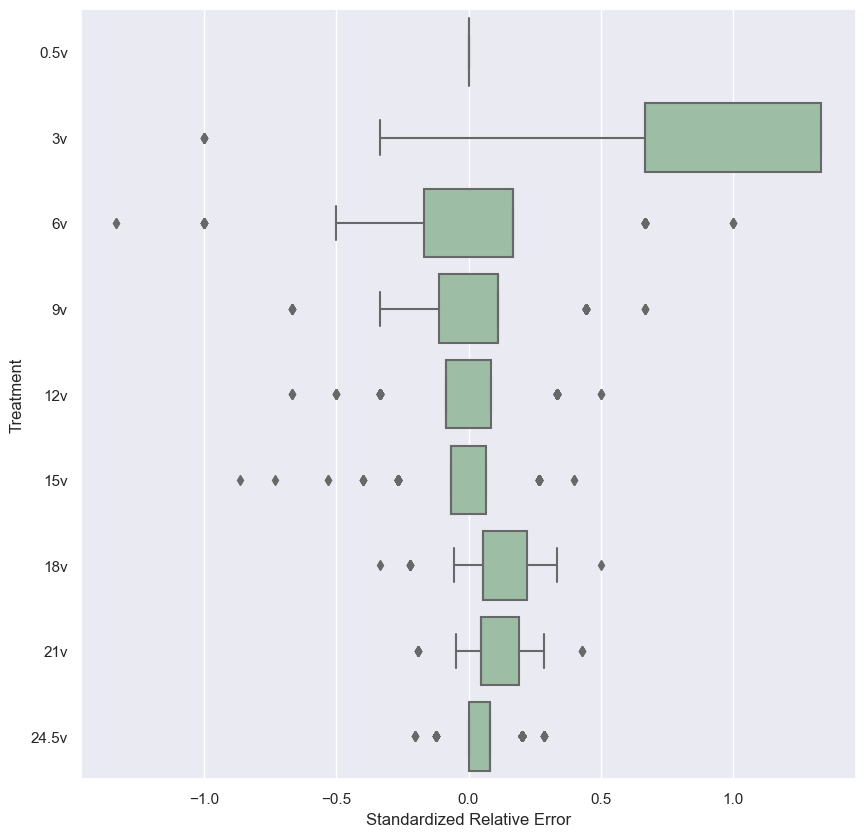

In [9]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('darkgrid')
ax = sns.boxplot(x='value', y='voltage', data=df_melt_remove, color='#99c2a2')
ax.set(xlabel='Standardized Relative Error', ylabel='Treatment')
plt.savefig('../docs 2nd Approach/img/Boxplot Remove Outlier STD Based whole Population.png')
plt.show()

Text(0, 0.5, 'Relative Error Voltage')

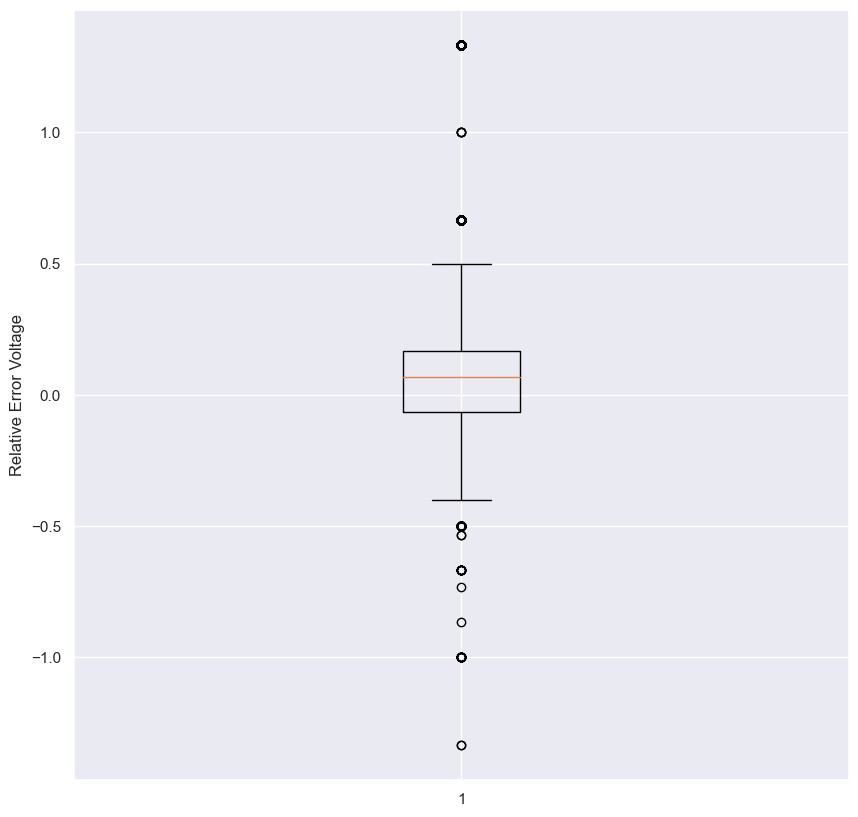

In [10]:
plt.boxplot(df_melt_remove['value'])
plt.ylabel('Relative Error Voltage')